# Module 12 Visualizations with Python HW
### Completed by Michelle Gordon

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)
covid_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


## viz 1

Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis


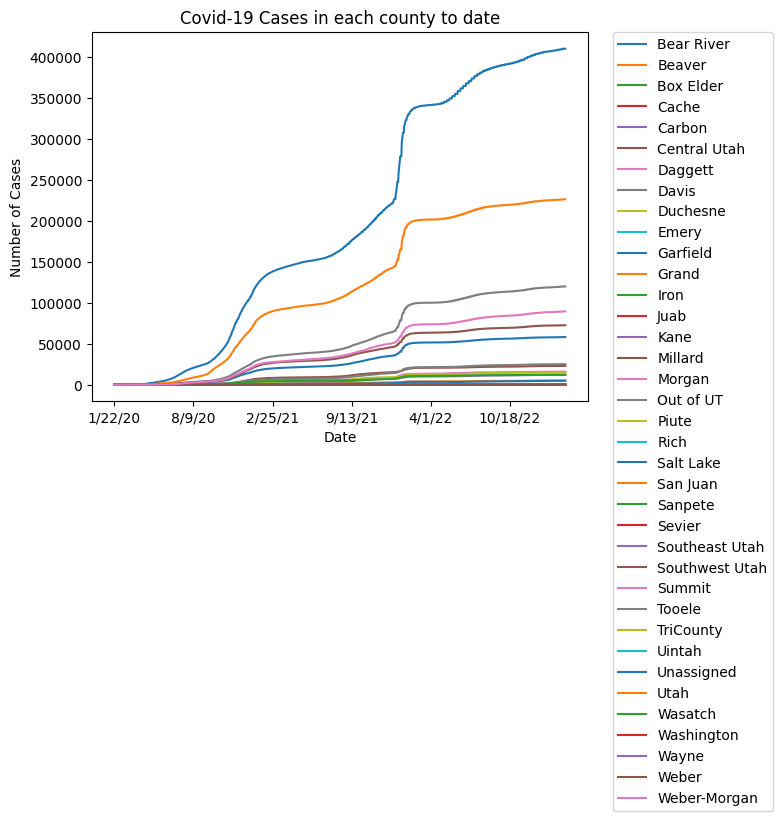

In [2]:
ut_cases = covid_df.loc[(covid_df['Province_State'] == "Utah")]
ut_cases = ut_cases.rename(columns={'Admin2': 'County', 'Province_State': 'State', 'Country_Region':'Country'})
cols = list(ut_cases.columns.values)
cols_dates = cols[10:-1]
plot_columns = ['County']
for val in cols_dates:
    plot_columns.append(val)
# create dataframe with only county names, dates, and values
county_cases = pd.DataFrame(ut_cases, columns=plot_columns)
# create line graph
# county_cases.set_index('County').T.plot(color="grey")
county_cases.set_index('County').T.plot()
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("Covid-19 Cases in each county to date")
# plt.figure(figsize=(10,6))
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # move legend outside of graph box so it doesn't overlap data points
#not sure how to get salt lake's line to be red, and get graph to be wider 

In [ ]:
# tried to fix viz 1 by creating lists of data for SLC using the following code but it didn't work

# # create dataframe with only salt lake county's data and format it so dates are values instead of column names
# slc_counts = county_cases.loc[(county_cases['County'] == 'Salt Lake')]
# slc_counts = pd.DataFrame(slc_counts, columns=plot_columns[1:-1])
# slc_counts = pd.DataFrame(slc_counts.stack())
# slc_counts = slc_counts.rename(columns={0: 'Running Total'})
# slc_counts = slc_counts.reset_index(level=(1,))
# slc_counts = slc_counts.rename(columns={'level_1': 'Date'})
# slc_rt = list(slc_counts['Running Total'])
# # Start and end dates
# start_date = datetime(2020, 1, 22)
# end_date = datetime(2023, 3, 7)

# # Create a list of dates
# dts = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

## viz 2

Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable


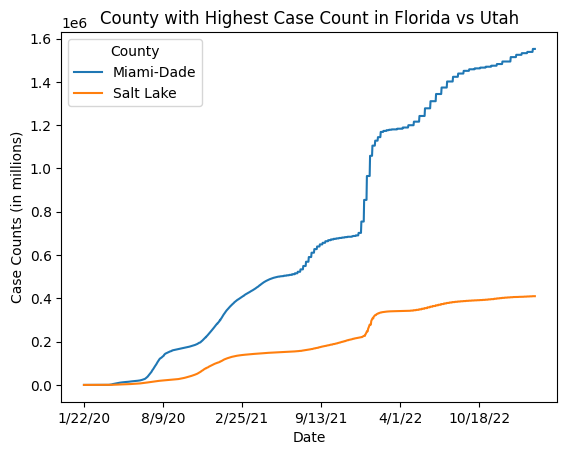

In [3]:
# cols = list(covid_df.columns.values)
fl_vs_ut = covid_df.loc[(covid_df['Province_State'] == "Florida") | (covid_df['Province_State'] == "Utah")]
# fl_vs_ut = covid_df.loc[(covid_df['Province_State'] == "Utah")]
fl_vs_ut = fl_vs_ut.rename(columns={'Admin2': 'County', 'Province_State': 'State', 'Country_Region':'Country'})
cols = list(fl_vs_ut.columns.values)
# fl_vs_ut['Total_Cases'] = fl_vs_ut.sum(axis=1, numeric_only=True)
# pd.options.display.float_format = '{:10f}'.format
cols_dates = cols[10:-1]
cnty_total = fl_vs_ut.groupby([cols[5], cols[4]])[cols_dates[-1]].max()
# cnty_total = fl_vs_ut.groupby([cols[5])[cols_dates[-1]].max()

cnty_total = pd.DataFrame(cnty_total)
cols2 = list(cnty_total.columns.values)
# find which county has the highest case counts in each state
cnty_total.sort_values(by=['3/8/23'], ascending=False)

cty_2_cty = fl_vs_ut.loc[(fl_vs_ut['County'] == 'Miami-Dade') | (fl_vs_ut['County'] == 'Salt Lake')]
cty_2_cty = pd.DataFrame(cty_2_cty, columns=plot_columns)
cty_2_cty.set_index('County').T.plot()
plt.xlabel("Date")
plt.ylabel("Case Counts (in millions)")
plt.title("County with Highest Case Count in Florida vs Utah")
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=15)

## viz 3

Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis


In [4]:
slc_cases = fl_vs_ut.loc[(fl_vs_ut['County'] == 'Salt Lake')]
slc_cases = pd.DataFrame(slc_cases, columns=plot_columns[1:-1])
slc_running_total =pd.DataFrame(slc_cases.stack())
slc_running_total = slc_running_total.rename(columns={0: 'Running Total'})

prev = 0

def daily_increase(cases):
    global prev 
    global diff
    diff = cases - prev
    prev = cases

    return diff


daily = pd.DataFrame(slc_running_total['Running Total'].apply(daily_increase))
daily = daily.rename(columns={'Running Total': 'Daily Increase'})


slc_running_total = slc_running_total.reset_index(level=(1,))
slc_running_total = slc_running_total.rename(columns={'level_1': 'Date'})
daily = daily.reset_index(level=(1,))
daily = daily.rename(columns={'level_1': 'Date'})
slc_running_total.head()

# slc_running_total['Date']

,Date,Running Total
UID,,
84049035,1/22/20,0
84049035,1/23/20,0
84049035,1/24/20,0
84049035,1/25/20,0
84049035,1/26/20,0


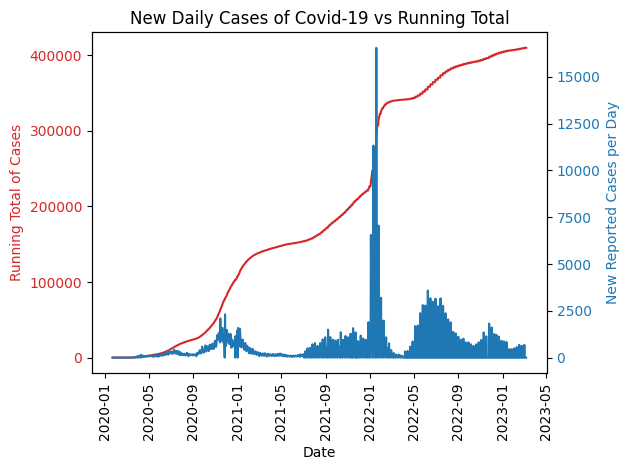

In [5]:
#plotting using lists instead of dataframes
import numpy as np
from datetime import datetime, timedelta

# Start and end dates
start_date = datetime(2020, 1, 22)
end_date = datetime(2023, 3, 7)

# Create a list of dates
dts = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

srt = list(slc_running_total['Running Total'])
di = list(daily['Daily Increase'])
dt = list(daily['Date'])
# dt2 = np.asarray(dt, dtype='datetime64[s]')

fig, ax1 = plt.subplots()
plt.title("New Daily Cases of Covid-19 vs Running Total")

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Running Total of Cases', color=color)
ax1.plot(dts, srt, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Reported Cases per Day', color=color)  # we already handled the x-label with ax1
ax2.plot(dts, di, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



# pandas.date_range(sdate,edate-timedelta(days=1),freq='d')


# x = np.asarray(x, dtype='datetime64[s]')
# ax[1].plot(x, y, 'd')
# ax[1].tick_params(axis='x', labelrotation=90)

## viz 4

Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county


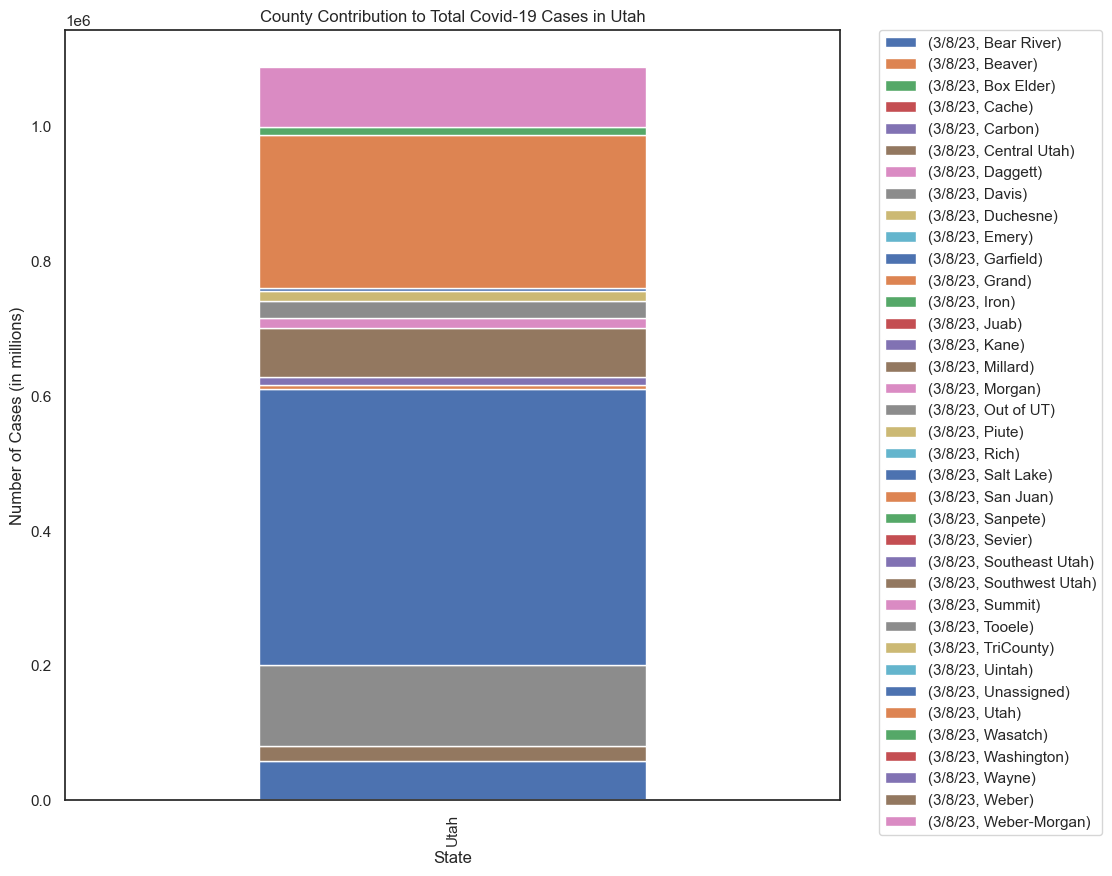

In [8]:
#I want to make a stacked bar chart showing county contributions to Utah's total cases.  

county_total = list(county_cases['3/8/23'])
counties = list(county_cases['County'])
county_max = pd.DataFrame(county_cases, columns=['County', '3/8/23'])
county_max
utah_max = pd.DataFrame(ut_cases, columns=['State', 'County', '3/8/23'])
utah_max
utah_pivot = utah_max.pivot(index ='State', columns ='County', values =['3/8/23'])


#set seaborn plotting aesthetics
sns.set(style='white')

# #create stacked bar chart
# fig, ax = plt.subplots(figsize=(10, 5))
utah_pivot.plot(kind='bar', stacked=True, figsize=(10,10), title="County Contribution to Total Covid-19 Cases in Utah")
plt.ylabel("Number of Cases (in millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# utah_pivot.head()

## extra credit (5 points)

Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
